<a href="https://colab.research.google.com/github/kelixirr/Complete-Machine-Learning-And-Data-Science-Course/blob/main/Predicting_Heart_Disease_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heart Disease Machine Learning Project

This is a classification problem in which we are going to indentify the heart disease status of patients based on certain features. This is a binary classification which means we have patients with either heart disease or not.

You can download the data from [kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset)

Originally it was taken from https://archive.ics.uci.edu/ml/datasets/heart+Disease here which contains 76 attributes but kaggle datase uses only 14 attributes to make classification.

Here we can have any evaluation metric based on the kind of project you are working on in real life. For example, what is the accuracy level you are looking for when you are making prediction from your model? How accurate the prediction should be?

Here are some of our features:

- age: Displays the age of the individual.

 - sex: Displays the gender of the individual using the following format : 1 = male 0 = female

- cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic

- trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

- chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

- fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

- restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

- thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

- exang- Exercise induced angina : 1 = yes 0 = no

- oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

- slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

- ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

- thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

- target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

## Importing Data And Tools

In [ ]:
#importing tools for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing models from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# importing evaluation metrics for the models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [ ]:
# importing data
df = pd.read_csv("/content/drive/MyDrive/Data/heart-disease.csv")

### Exploring Data

In [ ]:
df.head()   # top 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.shape

(303, 14)

In [ ]:
# checking the number of values in our target variable
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

This means we have 1 as heart disease and 0 as no heart disease. We can use this to train our model to classify and make actual prediction. Notice that our data samples are quite balanced in each case which is exactly what we should be aiming for.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

1 means male and 0 means female

In [ ]:
pd.crosstab(df.target, df.sex)  # comparing two columns

sex,0,1
target,,
0,24,114
1,72,93


This means more percentage of women are likely to have heart disease as compared to the percentage of men. If you take out the percentage then you will realize that women are more vulnerable than men. It stands at 75%

In [ ]:
(93/207)*100, (72/96)*100

(44.927536231884055, 75.0)

In [ ]:
(44.927536231884055 + 75.0)/2

59.96376811594203

We can say that 60% is the chance for a person to have heart disease. So we can try to optimized our model to perform better than this. This can be our baseline.

## EDA

In [ ]:
df.groupby(["target"]).mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


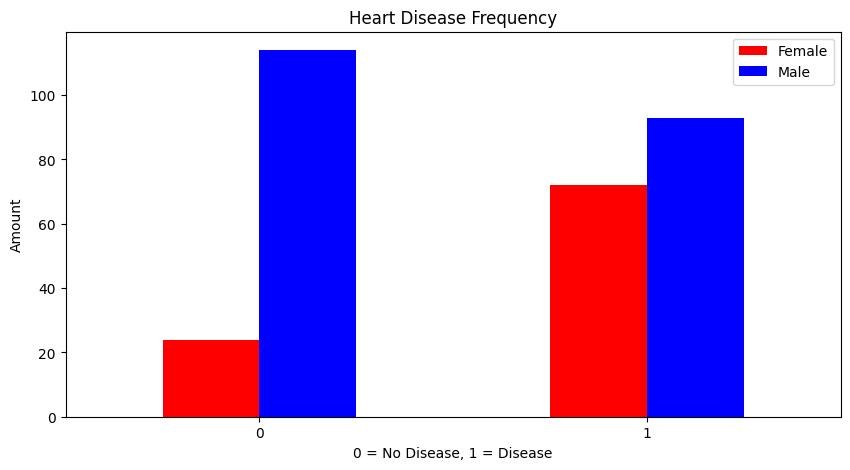

In [ ]:
# Create a plot
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,5), color=["red", "blue"])

# Add some attributes to it
plt.title("Heart Disease Frequency")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

Now let's check the relationship between age and max heart rate using plot

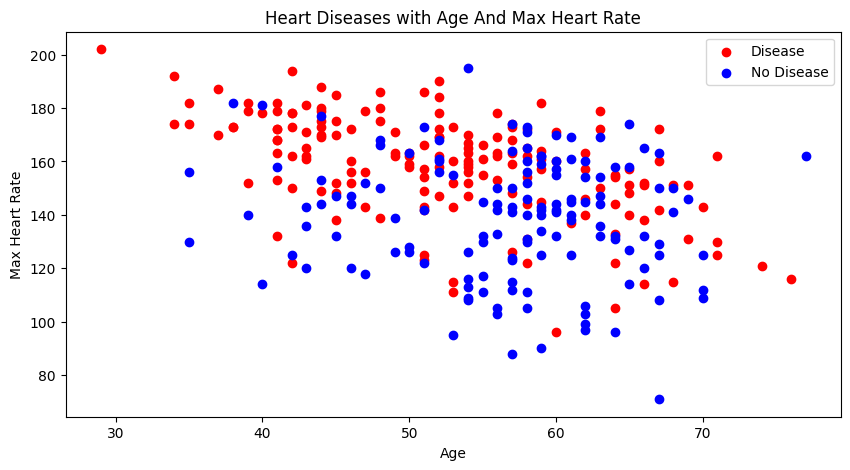

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(df.age[df.target==1], df.thalach[df.target==1], c="red")
ax.scatter(df.age[df.target==0], df.thalach[df.target==0], c="blue")

ax.set(title="Heart Diseases with Age And Max Heart Rate", xlabel="Age", ylabel="Max Heart Rate")
ax.legend(["Disease", "No Disease"])

Try to analyze the graph above and see how age and max heart rate has some sort of relationship with heart disease. As you can see people with high hight rate and around 40-50 have maximum number of heart disease. This may also be possible because of the number of data samples in that age range. With age the heart disease is even possible for people with lower heart rates in the graph. Now let's see the data distribution.

<Axes: ylabel='Frequency'>

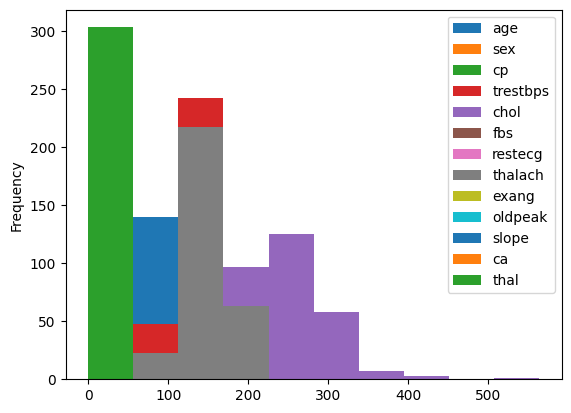

In [ ]:
df.drop("target", axis=1).plot.hist()   # let's check the data distribution

<Axes: ylabel='Frequency'>

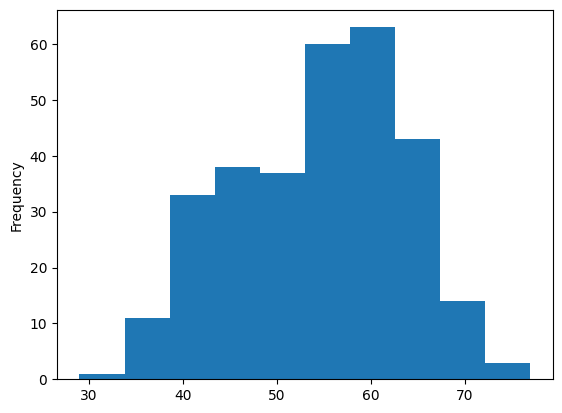

In [ ]:
df.age.plot.hist()    # age distribution of the population

As you can see that our graph which is normally distributed is kind of heavy towards right side this is just like the graph we created above.

Now let's analyze another independent variable chest pain.

cp - chest pain type
1. 0: Typical angina: chest pain related decrease blood supply to the heart
2. 1: Atypical angina: chest pain not related to heart
3. 2: Non-anginal pain: typically esophageal spasms (non heart related)
4. 3: Asymptomatic: chest pain not showing signs of disease

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


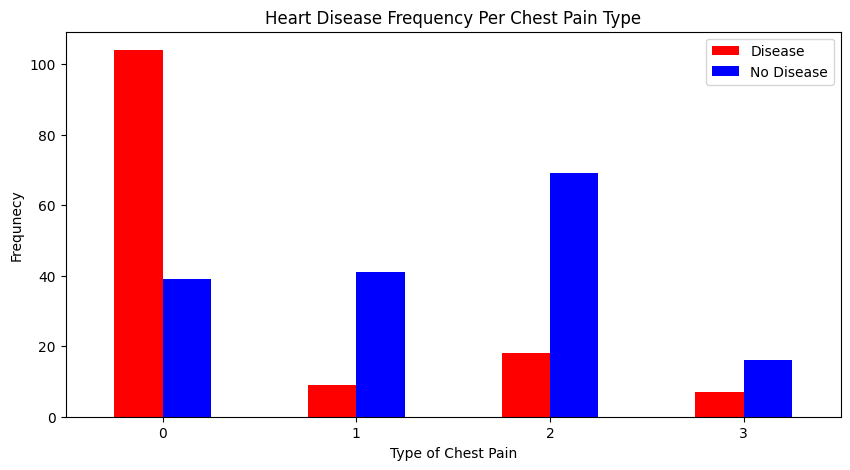

In [ ]:
# let's plot the above graph

pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,5),  color=["red", "blue"])

# Add some attributes to it
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Type of Chest Pain")
plt.ylabel("Frequnecy")
plt.legend(["Disease", "No Disease"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

Our focused should be on type 0 and 3 as 1 and 2 are not related to heart disease. Try to see the ratio between no disease and disease in 1 and 2 as it seems very few people have the disease due to 1 and in 0 we have many people which means chest pain indeed plays a role but 0 here is a contributing factor for majority.

In [ ]:
# now let's check the correlation between different variables
correlation_matrix = df.corr()
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

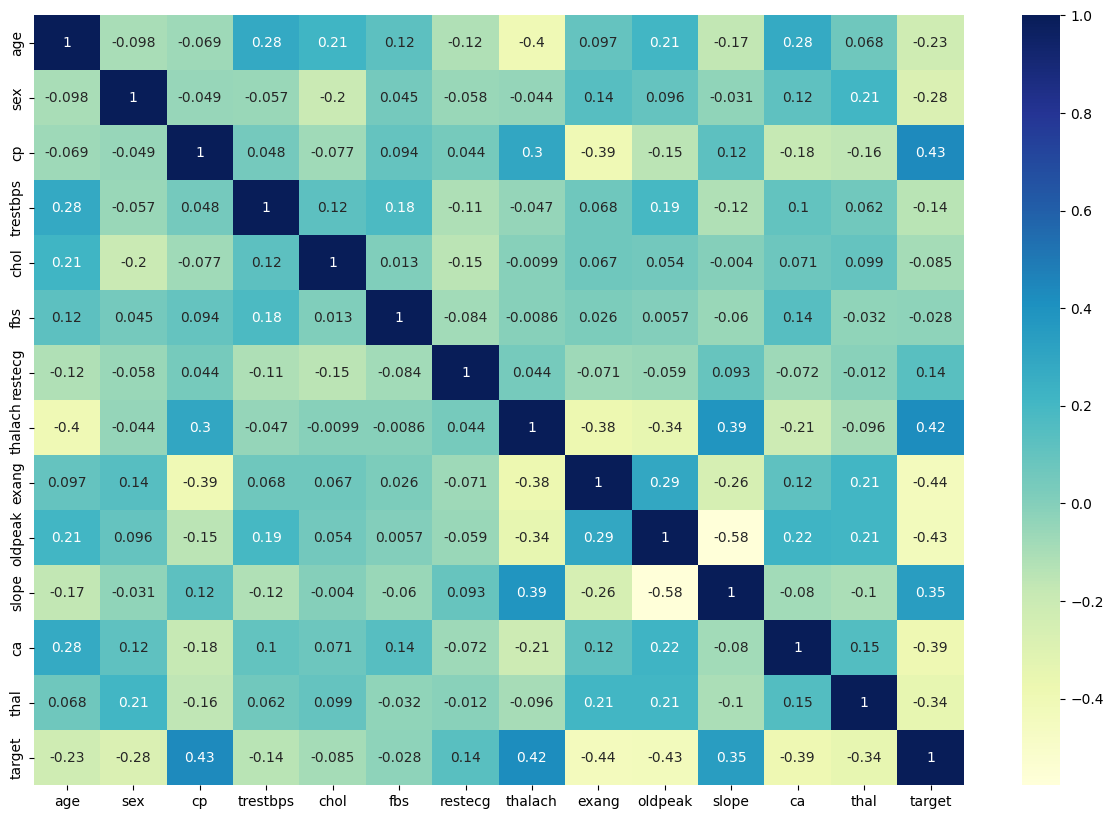

In [ ]:
# let's visulaize it
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Value closer to one means higher correlation where as value colser to 0 means lower correlation. Here our target varibale is either 0 or 1 so it will be difficult to compare the correlation between different varible to heart disease but in cases where you have numerical value you can simply use correlation to find the relationship. Here you can check the correlation betwen one independent varible to another.

You can also perform EDA in your own way and try to find some few feature combination or see what are some important features according to you. How the data is distributed and how they are correlated?

## Creating Training And Test Set

Let's create training and test set so that we can prepare our model for the real world.

In [ ]:
# we will use sklearn training and test set split method

np.random.seed(42)

X = df.drop("target", axis=1)  # independent variable
y = df.target.values           # dependent variable

# split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)  #percentage of data used for test set

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Fitting The Models

Now we have our training and test set. We can now select our models for the classfication problem.
There are various models you can choose for the classification problem. Here is a cheat code to select the right models: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

We will select:
1. Logistic Regression - [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. K-Nearest Neighbors - [KNeighboursClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
3. RandomForest - [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [ ]:
# now let's create a dictionary to put these models into it

models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()
          }

In [ ]:
# create a function to evaluate and fit
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  This function fits and evalautes the different models in models dict using sets

  """
  np.random.seed(42)  # for reprocudibility

  model_scores = {}

  for type, model in models.items():
    model.fit(X_train, y_train)     # fit the models in dict
    model_scores[type] = model.score(X_test, y_test)

  return model_scores




In [ ]:
models_scores = fit_and_score(models = models,
                              X_train = X_train,
                              y_train = y_train,
                              X_test = X_test,
                              y_test = y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
models_scores   # this is our models score on test data

{'KNN': 0.6885245901639344,
 'Logistic Regression': 0.8852459016393442,
 'Random Forest': 0.8360655737704918}

Notice we are not using validation set because we don't have much data

In [ ]:
# you can also create a bar graph

model_scores_df = pd.DataFrame(models_scores, index=["Accuracy"])
model_scores_df

,KNN,Logistic Regression,Random Forest
Accuracy,0.688525,0.885246,0.836066


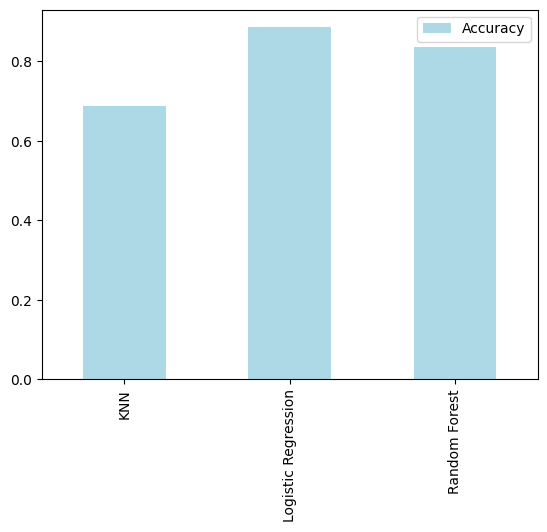

In [ ]:
model_scores_df.T.plot.bar(color='lightblue');

As you can see from the graph above logistic regression is performing better than other models.

Now let's hypertune our models and see what we can achieve

## Hyperparameter Tuning

In [ ]:
# KNN hyptertining
# there are various KNN parameters you can see that in sklearn documentation. We can hypertune n_neighbours which is default at 5 and see changes

# train scores list
train_scores = []

# test scores list
test_scores = []

# neighbours different values

neighbors = range(1, 21)

# algorithm

knn = KNeighborsClassifier()

# looping through different neighbors values

for i in neighbors:
  knn.set_params(n_neighbors = i)    # setting different params
  knn.fit(X_train, y_train)          # fitting the model
  train_scores.append(knn.score(X_train, y_train))  # update the training score list
  test_scores.append(knn.score(X_test, y_test))     # update the test score list





In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

Max KNN score on test data: 75.41%


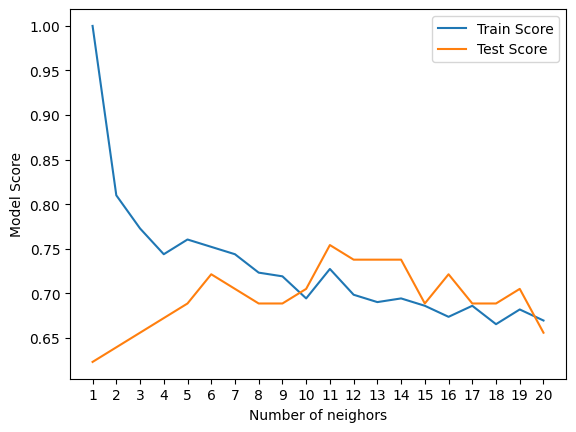

In [ ]:
# let's use graph
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighors')
plt.ylabel("Model Score")
plt.legend()

print(f"Max KNN score on test data: {max(test_scores)*100:.2f}%")

The best score here is still less than our logistic regression so we will discard it.

Now let's hypertune other models using Randomized Search CV which test and evaluates the model by trying different combinations
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

We have different parameters in logistic regressiona and random forest classifier as mentioned in sklearn documentation


In [ ]:
# logistic regression

log_reg_grid = {"C": np.logspace(-4, 4, 20),     # c is choosen on logarithmic space
                "solver": ["liblinear"] }        # liblinear includes L1 and L2 penality

# Random Forest Classifier

rf_grid = {"n_estimators": np.arange(10, 100, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}



In [ ]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
# Let's check for Random Forest Classifier

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 18,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [ ]:
rs_rf.score(X_test, y_test)

0.819672131147541

Our Logistic Regression still perfoms better.
Now let's tune our model using GridSearchCV:

RandomizedSearchCV - tries n_iter combinations of hyperparameters and saves the best.
GridSearchCV - tries every single combination of hyperparameters and saves the best.

In [ ]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                          cv=5,
                          verbose=True,
                          param_grid=log_reg_grid)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

We are getting the same result. Now let's check different evalaution metrics for this.

## Evaluation Of Our Classification Model

We want:

1. ROC curve and AUC score - plot_roc_curve()
2. Confusion matrix - confusion_matrix()
3. Classification report - classification_report()
4. Precision - precision_score()
5. Recall - recall_score()
6. F1-score - f1_score()

These are other metrics in addition to accuracy.

- Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).
- Precision - Proportion of true positives over total number of samples. Higher precision leads to less false positives.
- Recall - Proportion of true positives over total number of true positives and - false negatives. Higher recall leads to less false negatives.
- F1 score - Combines precision and recall into one metric. 1 is best, 0 is worst.
- Classification report - Sklearn has a built-in function called - classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.
- ROC Curve - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.
- Area Under Curve (AUC) - The area underneath the ROC curve. A perfect model achieves a score of 1.0.
___

https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/
_
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
-
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
-
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
_
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
-
https://en.wikipedia.org/wiki/Receiver_operating_characteristic
_
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

In [ ]:
# make prediction on test data

y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_test   # compare both y_preds and y_test output and see the difference

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

## ROC Curve And AUC Score
- It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

___
Consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease

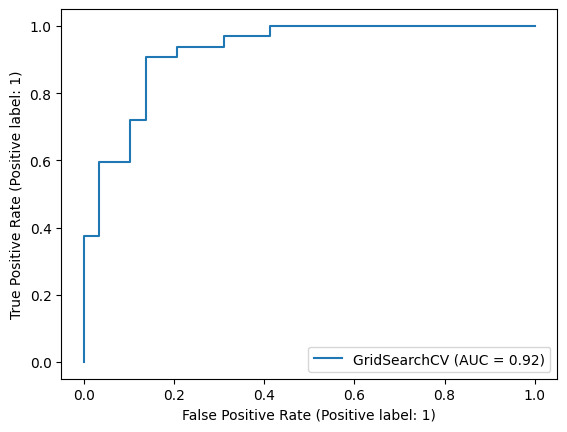

In [ ]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

## Confusion Matrix
A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


Text(8.222222222222223, 0.5, 'predicted label')

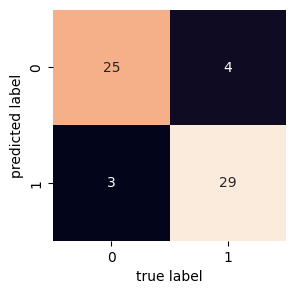

In [ ]:
# let's plot it
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label")

See black boxes to indentify the model predicted errors. Boxes contain the values.

## Classification Report
A classification report will also give us information of the precision and recall of our model for each class

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



- Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
- Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
- F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
- Support - The number of samples each metric was calculated on.
- Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
- Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
- Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).



## Cross Validation


Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.
https://scikit-learn.org/stable/modules/cross_validation.html

In [ ]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
# import cross-val
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C =0.23357214690901212,
                         solver = "liblinear")

In [ ]:
# now let's calculate the cross val accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,   # cross val 5 folds
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [ ]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [ ]:
# now let's find other metrics

cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [ ]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [ ]:
# recall

cv_recall = cross_val_score(clf,
                            X,
                            y,
                            cv=5,
                            scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [ ]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [ ]:
# f1 score

cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring ="f1")
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [ ]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

In [ ]:
# let's visulize
cv_metrics = pd.DataFrame({"cv_acc":cv_acc, "cv_precision": cv_precision, "cv_recall":cv_recall, "cv_f1": cv_f1}, index=[0])
cv_metrics

,cv_acc,cv_precision,cv_recall,cv_f1
0,0.847978,0.821587,0.927273,0.87054


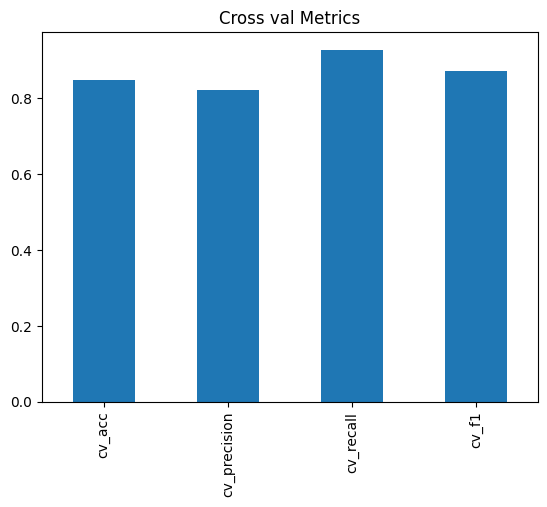

In [ ]:
cv_metrics.T.plot.bar(title="Cross val Metrics", legend=False);

## Feature Importance
Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

In [ ]:
# fit the instance of the model
clf.fit(X_train, y_train);

In [ ]:
# check coefficicients
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.

In [ ]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': 0.003699220776580221,
 'sex': -0.9042409028785717,
 'cp': 0.6747282587404362,
 'trestbps': -0.011613401339975146,
 'chol': -0.0017036439067759743,
 'fbs': 0.047876881148997324,
 'restecg': 0.3349019815885189,
 'thalach': 0.02472938284108309,
 'exang': -0.6312040612837573,
 'oldpeak': -0.5759095045469952,
 'slope': 0.4709514073081419,
 'ca': -0.6516534770577476,
 'thal': -0.6998420764664995}

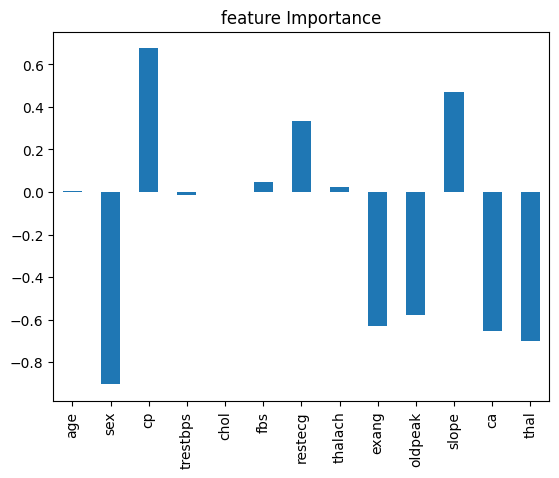

In [ ]:
# visulaize

features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="feature Importance", legend=False);

This reflects the relationship between different variables to target varible. Sex has negative value which means as the value of sex increases the target variable decreases.

In [ ]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


As you can see the as the value of sex goes up from 0 to 1 the value of target variable goes down which means if the sex contribution is negative more people are likely to have heart disease which means women here as compared to men the other way.

___
Now let's see the positive one:
slope
What is it?
slope is the "slope of the peak exercise ST segment" where:

0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart

__

According to our model learning the slope has positive correlation or contribution. As slope increase the value of target also increases. Let's check

In [ ]:
pd.crosstab(df.slope, df.target)

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


As you can see the value of slope also increases with target.

With this information you can try to see how model is learning and what features are contributing more. You can remove some features if they are not contributing or do some feature engineering if you like.

As we can see our model fail to cross our 95% accuracy that we had in mind so what now? Well, you can try different model. you can try collecting more data maybe and maybe you can improve the current model.

In [ ]:
# let's save our model
from joblib import dump, load
dump(gs_log_reg, 'heartDisease.joblib')

['heartDisease.joblib']

In [ ]:
model_instance = load("heartDisease.joblib")
model_instance

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)